In [61]:
"""
We implement a first approach applying a classifying method based on NN
using data from MC simulations to the decay of the omega meson for
Carbon target.
"""


'\nWe implement a first approach applying a classifying method based on NN\nusing data from MC simulations to the decay of the omega meson for\nCarbon target.\n'

## Basic Modules
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) used for data manipulation and analysis.
- [Matplotlib](https://matplotlib.org/stable/index.html) used to generate plots.
- [Numpy](https://numpy.org/) (certainly) the most well known scientific library of python.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab

from scipy.constants import golden

# import uproot4 to manage data using numpy
import uproot

# import torch, specialized library for deep learning
import torch
import sys
import os
import time

# setting params for plot style
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)


# Loading Data Simulated of the EG2 Experiment

In [63]:
# setting the current path
PATH = os.getcwd()
PATH = PATH.replace('/C ', '')
os.chdir(PATH)

In [77]:
list_df_Cbkg1 = []
list_df_Cbkg2 = []

for i in range(1, 3):
    bkg_file = uproot.open('data/C_signalpbkg/combC_0' + str(i) + '.root')

    TTree_bkg1 = bkg_file['mix;2']
    TTree_bkg2 = bkg_file['mix;1']

    df2 = TTree_bkg1.arrays(['Event', 'mc_Entry', 'mc_E', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_wD'], library='pd')
    df3 = TTree_bkg2.arrays(['Event', 'mc_Entry', 'mc_E', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_wD'], library='pd')

    # extract outliers
    df2 = df2[df2 != -9999.0].dropna()
    df3 = df3[df3 != -9999.0].dropna()

    list_df_Cbkg1.append(df2)
    list_df_Cbkg2.append(df3)

df_Cbkg1 = pd.concat(list_df_Cbkg1)
df_Cbkg2 = pd.concat(list_df_Cbkg2)

df_Cbkg = pd.concat([df_Cbkg1, df_Cbkg2])

In [78]:
df_Cbkg[df_Cbkg['Event'] == 271892.0]

,Event,mc_Entry[0],mc_Entry[1],mc_Entry[2],mc_Entry[3],mc_E[0],mc_E[1],mc_E[2],mc_E[3],mc_Px[0],...,mc_Px[3],mc_Py[0],mc_Py[1],mc_Py[2],mc_Py[3],mc_Pz[0],mc_Pz[1],mc_Pz[2],mc_Pz[3],mc_wD
141414,271892.0,1126092.0,1126093.0,1126091.0,1126094.0,0.234185,0.319169,1.011448,0.946299,-0.047,...,-0.013,0.077,-0.056,-0.507,-0.388,0.165,0.262,0.869,0.863,0.899490
141415,271892.0,1126115.0,1126114.0,1126112.0,1126113.0,0.208774,0.206070,0.598637,1.129574,0.021,...,-0.337,0.095,-0.115,0.241,0.312,-0.121,0.084,0.501,1.032,1.312011
141416,271892.0,1126124.0,1126126.0,1126123.0,1126125.0,0.265037,1.072670,0.150742,0.330268,0.184,...,0.116,-0.130,-0.218,-0.003,0.110,-0.003,1.039,0.095,0.289,1.001102
141417,271892.0,1126139.0,1126136.0,1126137.0,1126138.0,1.070780,0.158325,0.148439,0.159214,-0.451,...,-0.008,0.498,0.045,0.029,0.063,0.822,0.031,0.093,0.146,0.779330
141418,271892.0,1126148.0,1126151.0,1126149.0,1126150.0,0.168561,1.397023,0.127000,0.520515,-0.094,...,0.044,0.009,-0.413,-0.123,-0.430,-0.004,1.315,0.010,0.290,1.167482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141640,271892.0,1127882.0,1127880.0,1127877.0,1127883.0,0.511597,0.458339,0.040212,0.507632,-0.114,...,0.000,0.110,-0.075,0.007,0.199,0.466,0.419,0.028,0.467,0.580641
141641,271892.0,1127882.0,1127880.0,1127877.0,1127884.0,0.511597,0.458339,0.040212,0.530695,-0.114,...,-0.214,0.110,-0.075,0.007,0.080,0.466,0.419,0.028,0.479,0.485362
141642,271892.0,1127882.0,1127880.0,1127877.0,1127885.0,0.511597,0.458339,0.040212,0.693312,-0.114,...,-0.036,0.110,-0.075,0.007,0.125,0.466,0.419,0.028,0.681,0.535168
141643,271892.0,1127882.0,1127880.0,1127878.0,1127881.0,0.511597,0.458339,0.120905,0.448603,-0.114,...,-0.086,0.110,-0.075,0.075,0.085,0.466,0.419,0.092,0.432,0.518299


In [79]:
df_Cbkg.shape

(654755, 22)

In [68]:
list_path_C = np.arange(100).tolist()

for i in range(100):
    if i < 9:
        list_path_C[i] = 'data/Csignal/00/omegaC_0' + str(i+1) + '.root'
    else:
        list_path_C[i] = 'data/Csignal/00/omegaC_' + str(i+1) + '.root'

list_C1 = []
list_C2 = []

for i in range(100):
    if i+1 == 31 or i+1 == 50 or i+1 == 98 or i+1 == 100:
        pass
    else:
        data_Croot = uproot.open(list_path_C[i])

        TTree_signal1 = data_Croot['mix;7']
        TTree_signal2 = data_Croot['mix;6']
        df_C1 = TTree_signal1.arrays(['Event', 'mc_Entry', 'mc_E', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_wD', 'mc_ParentID'], library='pd')
        df_C2 = TTree_signal2.arrays(['Event', 'mc_Entry', 'mc_E', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_wD', 'mc_ParentID'], library='pd')

        df_C1 = df_C1[df_C1 > 0].dropna()
        df_C2 = df_C2[df_C2 > 0].dropna()

        list_C1.append(df_C1)
        list_C2.append(df_C2)

df_C1 = pd.concat(list_C1)
df_C2 = pd.concat(list_C2)

df_C = pd.concat([df_C1, df_C2])

In [69]:
# make a cut selecting omega candidates with the correct parentID
df_Csignal = df_C[( (df_C['mc_ParentID[1]'] == 223.0) & (df_C['mc_ParentID[2]'] == 223.0) & (df_C['mc_ParentID[3]'] == 223.0) )]

df_C[df_C['Event'] == 62.0]
df_Csignal

,Event,mc_Entry[0],mc_Entry[1],mc_Entry[2],mc_Entry[3],mc_E[0],mc_E[1],mc_E[2],mc_E[3],mc_Px[0],...,mc_Py[3],mc_Pz[0],mc_Pz[1],mc_Pz[2],mc_Pz[3],mc_wD,mc_ParentID[0],mc_ParentID[1],mc_ParentID[2],mc_ParentID[3]
213,62.0,366.0,362.0,363.0,364.0,1.511030,0.381856,0.207053,0.339026,0.560580,...,0.161751,1.374880,0.217426,0.168055,0.183487,0.761483,223.0,223.0,223.0,223.0
215,65.0,376.0,379.0,377.0,378.0,0.650874,0.893548,0.194104,0.241624,0.239979,...,0.169774,0.552864,0.864243,0.043620,0.164646,0.791042,223.0,223.0,223.0,223.0
1053,332.0,1941.0,1938.0,1939.0,1940.0,0.928873,0.192345,0.344603,0.434931,0.322285,...,0.272811,0.849757,0.074341,0.175386,0.324881,0.796128,223.0,223.0,223.0,223.0
1573,499.0,2918.0,2919.0,2917.0,2920.0,0.492869,0.687961,0.174929,0.756987,0.245645,...,0.323165,0.291196,0.658554,0.147514,0.472846,0.786965,223.0,223.0,223.0,223.0
1815,545.0,3213.0,3211.0,3210.0,3212.0,1.040669,0.242394,0.811748,0.448346,0.466017,...,0.100042,0.891297,0.077463,0.730183,0.407067,0.780433,223.0,223.0,223.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004220,330738.0,1936749.0,1936746.0,1936747.0,1936748.0,0.983158,0.192051,0.348455,0.366295,0.406457,...,0.239547,0.884169,0.067238,0.321026,0.261308,0.801816,223.0,223.0,223.0,223.0
1004704,330933.0,1937856.0,1937854.0,1937851.0,1937852.0,1.683264,0.896520,0.255749,0.667018,0.734611,...,0.051262,1.506377,0.883541,0.231230,0.662056,0.783400,223.0,223.0,223.0,223.0
1004815,330963.0,1938032.0,1938029.0,1938030.0,1938031.0,0.744530,0.259455,0.231481,0.709896,0.450220,...,0.372308,0.546747,0.069156,0.219351,0.598869,0.791529,223.0,223.0,223.0,223.0
1005506,331201.0,1939414.0,1939417.0,1939413.0,1939418.0,0.169546,0.798800,0.080074,0.945608,0.012623,...,0.470622,0.095020,0.660208,0.060703,0.793941,0.781756,223.0,223.0,223.0,223.0


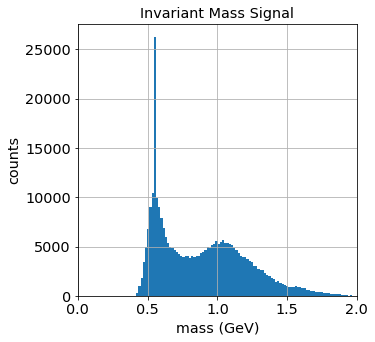

In [70]:
# plotting invariant mass for the signal
data_signal = df_Cbkg
p_gg_signal =  [data_signal['mc_E[2]'] + data_signal['mc_E[3]'], data_signal['mc_Px[2]'] + data_signal['mc_Px[3]'], data_signal['mc_Py[2]'] + data_signal['mc_Py[3]'],
                data_signal['mc_Pz[2]'] + data_signal['mc_Pz[3]']]

four_momentum = [data_signal['mc_E[0]'] + data_signal['mc_E[1]'] + p_gg_signal[0], data_signal['mc_Px[0]'] + data_signal['mc_Px[1]'] + p_gg_signal[1],
                data_signal['mc_Py[0]'] + data_signal['mc_Py[1]'] + p_gg_signal[2], data_signal['mc_Pz[0]'] + data_signal['mc_Pz[1]'] + p_gg_signal[3]]

invariant_mass = np.sqrt(four_momentum[0]**2 - four_momentum[1]**2 - four_momentum[2]**2 - four_momentum[3]**2)

plt.figure(figsize=(5,5))
plt.hist(df_Cbkg['mc_wD'], bins=100)
plt.title('Invariant Mass Signal')
plt.xlabel('mass (GeV)')
plt.ylabel('counts')
plt.xlim([0, 2.])
plt.grid();

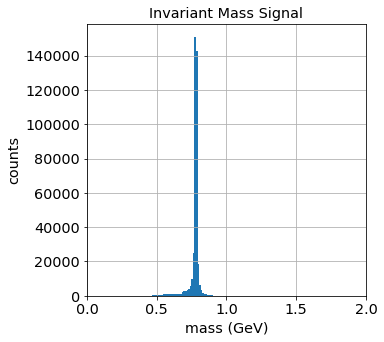

In [71]:
# plotting invariant mass for the signal
data_signal = df_Csignal
p_gg_signal =  [data_signal['mc_E[2]'] + data_signal['mc_E[3]'], data_signal['mc_Px[2]'] + data_signal['mc_Px[3]'], data_signal['mc_Py[2]'] + data_signal['mc_Py[3]'],
                data_signal['mc_Pz[2]'] + data_signal['mc_Pz[3]']]

four_momentum = [data_signal['mc_E[0]'] + data_signal['mc_E[1]'] + p_gg_signal[0], data_signal['mc_Px[0]'] + data_signal['mc_Px[1]'] + p_gg_signal[1],
                data_signal['mc_Py[0]'] + data_signal['mc_Py[1]'] + p_gg_signal[2], data_signal['mc_Pz[0]'] + data_signal['mc_Pz[1]'] + p_gg_signal[3]]

invariant_mass = np.sqrt(four_momentum[0]**2 - four_momentum[1]**2 - four_momentum[2]**2 - four_momentum[3]**2)

plt.figure(figsize=(5,5))
plt.hist(df_Csignal['mc_wD'], bins=100)
plt.title('Invariant Mass Signal')
plt.xlabel('mass (GeV)')
plt.ylabel('counts')
plt.xlim([0, 2.])
plt.grid();

Let's take the *difference of invariant mass*

$$ \Delta m_{\pi^+ \pi^- \pi^0} = m_{\pi^+ \pi^- \pi^0} - m_{\gamma \gamma} + M_{\pi^0} $$

where $M_{\pi^0}$ corresponds to the expected PDG value. We select candidates with an invariant mass close to this value.

In [72]:
M_pi0 = 0.1349770

mass_gg_signal = np.sqrt(p_gg_signal[0]**2 - p_gg_signal[1]**2 - p_gg_signal[2]**2 - p_gg_signal[3]**2)

delta_invariant_mass = invariant_mass - mass_gg_signal + M_pi0

# add the invariant mass difference to the data
df_delta_inv_mass_signal = pd.DataFrame(delta_invariant_mass, columns=['Delta Invariant Mass'])

df_Csignal = pd.concat([df_Csignal, df_delta_inv_mass_signal], axis=1)

In [80]:
mu = 0.782 ; width = 3 * 0.024

# selecting omega candidates close to the mass of the meson omega
df_Csignal = df_Csignal[(df_Csignal['Delta Invariant Mass'] > mu-width) & (df_Csignal['Delta Invariant Mass'] < mu+width)]

# labeling omega candidates
df_Csignal['target'] = 1
df_Cbkg['target'] = 0

df_Cbkg = df_Cbkg.sample(n=int(len(df_Csignal)))

### Dataset & Dataloader

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

In [81]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import random_split

class OmegaDataSet(Dataset):
    def __init__(self, X_omega, y_omega):
        self.X = X_omega
        self.Y = y_omega

    def __len__(self):
        return self.X.size()[0]

    def __getitem__(self, i):
        return self.X[i], self.Y[i]

In [82]:
data = pd.concat([df_Csignal, df_Cbkg])

XX = torch.Tensor(data[['mc_E[0]', 'mc_E[1]', 'mc_E[2]', 'mc_E[3]', 'mc_Px[0]', 'mc_Px[1]',
       'mc_Px[2]', 'mc_Px[3]', 'mc_Py[0]', 'mc_Py[1]', 'mc_Py[2]', 'mc_Py[3]',
       'mc_Pz[0]', 'mc_Pz[1]', 'mc_Pz[2]', 'mc_Pz[3]']].values)

YY = torch.Tensor(data[['target']].values)

dataset = OmegaDataSet(XX, YY)
batch_size = 16
validation_split = .1
shuffle_dataset = True
random_seed= 42

In [83]:
# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)


# Optimization and Evaluation

In [89]:
def train_model(net, dataset, optimizer, epochs=1, batch_size=1, device='cpu',
               validation_split=.9, random_seed=42, reports_every=1):
  # Change the net to the chosen device
  net.to(device)

  # Show the amount of parameters of the NN
  print('Number of parameters:', net.num_parameters())

  # Show arquitecture of the NN
  print('Red:', net)

  # Create a dataloader from the dataset
  train_size = int(validation_split * len(dataset))
  test_size = len(dataset) - train_size
  train_dataset, val_dataset = random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(random_seed))

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

  # Define the optimizer
  # optimizer = torch.optim.SGD(red.parameters(), lr)

  # Define a Loss Function
  LossFunction = torch.nn.BCELoss()

  # Define a list for the Loss Function value finishing each epoch
  train_loss, train_acc = [], []
  val_loss, val_acc = [], []

  # Start the training
  time_epochs = 0.
  for e in range(1, epochs+1):
    beginning_epoch = time.perf_counter()

    net.train()

    for (x, y) in train_loader:
      # Make sure tensors used are in the device
      x, y = x.to(device), y.to(device)

      # Compute forward (pasada hacia adelante)
      y_pred = net.forward(x)

      # Compute the Loss Function
      L = LossFunction(y_pred, y)

      # Compute the gradients backward (backpropagation)
      L.backward()

      # Stochastic Gradient Descent to actualize the parameters
      optimizer.step()

      # Clear the gradients
      optimizer.zero_grad()

    time_epochs += time.perf_counter() - beginning_epoch

    # Report the number of right answers each "reports_every" amount of epochs
    if e % reports_every == 0:

        # Calculate the certainty of the predictions on the train and val set
        X_train = train_dataset.dataset[train_dataset.indices][0].to(device)
        Y_train = train_dataset.dataset[train_dataset.indices][1].to(device)

        X_val = val_dataset.dataset[val_dataset.indices][0].to(device)
        Y_val = val_dataset.dataset[val_dataset.indices][1].to(device)

        # Predict using the neural network
        net.eval()
        with torch.no_grad():
            Y_train_pred = net.forward(X_train)
            Y_val_pred = net.forward(X_val)

        # Calculate the Loss Function of all the dataset
        L_total_train = LossFunction(Y_train_pred, Y_train)
        L_total_val = LossFunction(Y_val_pred, Y_val)

        # Add the value of the Loss Function
        train_loss.append(L_total_train.item())
        val_loss.append(L_total_val.item())

        # Choose a class depending of the value of Y_train
        Y_train_pred_bin = (Y_train_pred >= 0.5).float()
        Y_val_pred_bin = (Y_val_pred >= 0.5).float()

        right_answers_train = torch.sum(Y_train_pred_bin == Y_train).item()
        right_answers_val = torch.sum(Y_val_pred_bin == Y_val).item()
        accuracy_train = (right_answers_train / Y_train.size()[0]) * 100
        accuracy_val = (right_answers_val / Y_val.size()[0]) * 100
        train_acc.append(accuracy_train)
        val_acc.append(accuracy_train)

        sys.stdout.write(
            '\rEpoch:{0:03d}'.format(e) + ' Train Accuracy:{0:.2f}%'.format(accuracy_train)
                + ' Train Loss:{0:.4f}'.format(L_total_train) + ' Val Accuracy:{0:.2f}%'.format(accuracy_val)
                + ' Val Loss:{0:.4f}'.format(L_total_val)
                + ' Time/epoch:{0:.3f}s'.format(time_epochs/e)
        )
    
  return train_loss, train_acc, val_loss, val_acc


# Defining Neural Network Models

To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the `__init__` function and specify how data will pass through the network in the `forward` function, and how parameters (actually, the gradients of the parameters) are going to be updated in the `backpropagation` algorithm (implicit/hidden in PyTorch). To accelerate operations in the neural network, we move it to the GPU (`cuda`) if available (if not, it is executed in the `cpu` device).

## FFNN

First, we employ the more basic neural network, Feed Forward Neural Network (FFNN), with different hidden layer sizes, `relu` activation function, with and without `dropout`, and testing `SGD`, `RMSprop` and `Adam` optimizers. 

In [90]:
# Net pytorch style
class FFNN(torch.nn.Module):
    def __init__(self, d0=16, d1=100, d2=200, d3=300, d4=200, d5=100, l_do=[0, 0, 0, 0, 0]):
        super(FFNN, self).__init__()

        # Define the relu function
        self.relu = torch.nn.ReLU()

        # Define layers (nn.module automatically register the 
        # parameters associated)
        self.fc1 = torch.nn.Linear(d0, d1, bias=True)
        self.do1 = torch.nn.Dropout(p=l_do[0])
        self.fc2 = torch.nn.Linear(d1, d2, bias=True)
        self.do2 = torch.nn.Dropout(p=l_do[1])
        self.fc3 = torch.nn.Linear(d2, d3, bias=True)
        self.do3 = torch.nn.Dropout(p=l_do[2])
        self.fc4 = torch.nn.Linear(d3, d4, bias=True)
        self.do4 = torch.nn.Dropout(p=l_do[3])
        self.fc5 = torch.nn.Linear(d4, d5, bias=True)
        self.do5 = torch.nn.Dropout(p=l_do[4])
        self.fc6 = torch.nn.Linear(d5, 1, bias=True)


    def num_parameters(self):
        total = 0
        for p in self.parameters():
            total += p.numel()
        return total


    # Compute the forward
    def forward(self, x):
        u1 = self.fc1(x)
        h1 = self.relu(u1)
        h1 = self.do1(h1)
        u2 = self.fc2(h1)
        h2 = self.relu(u2)
        h2 = self.do2(h2)
        u3 = self.fc3(h2)
        h3 = self.relu(u3)
        h3 = self.do3(h3)
        u4 = self.fc4(h3)
        h4 = self.relu(u4)
        h4 = self.do4(h4)
        u5 = self.fc5(h4)
        h5 = self.relu(u5)
        h5 = self.do5(h5)
        u6 = self.fc6(h5)
        y_pred = torch.sigmoid(u6)

        return y_pred


### Model 1

In [94]:
model_1 = FFNN(d0=16)

lr = 0.1
epochs = 15
optimizer = torch.optim.SGD(model_1.parameters(), lr)
train_loss_1, train_acc_1, val_loss_1, val_acc_1 = train_model(model_1, dataset, optimizer, epochs=epochs, batch_size=64, device='cpu',
                                            validation_split=0.95, random_seed=42, reports_every=1)

# plot_results(train_loss, train_acc, model_name=' [relu, relu] for Train Set')
# plot_results(val_loss, val_acc, model_name=' [relu, relu] for Validation Set')

Number of parameters: 162601
Red: FFNN(
  (relu): ReLU()
  (fc1): Linear(in_features=16, out_features=100, bias=True)
  (do1): Dropout(p=0, inplace=False)
  (fc2): Linear(in_features=100, out_features=200, bias=True)
  (do2): Dropout(p=0, inplace=False)
  (fc3): Linear(in_features=200, out_features=300, bias=True)
  (do3): Dropout(p=0, inplace=False)
  (fc4): Linear(in_features=300, out_features=200, bias=True)
  (do4): Dropout(p=0, inplace=False)
  (fc5): Linear(in_features=200, out_features=100, bias=True)
  (do5): Dropout(p=0, inplace=False)
  (fc6): Linear(in_features=100, out_features=1, bias=True)
)
Epoch:015 Train Accuracy:99.79% Train Loss:0.0082 Val Accuracy:99.76% Val Loss:0.0083 Time/epoch:41.075s

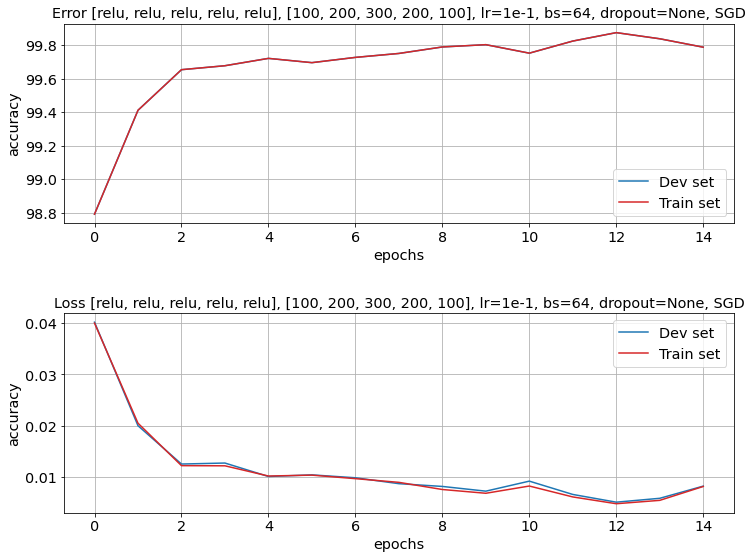

In [95]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=.45)
ax1 = fig.add_subplot(211)
ax1.set_title("Error" + ' [relu, relu, relu, relu, relu], [100, 200, 300, 200, 100], lr=1e-1, bs=64, dropout=None, SGD')    
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.plot(val_acc_1, c='C0', label='Dev set')
ax1.plot(train_acc_1, c='C3', label='Train set')
ax1.legend()
ax1.grid()
ax2 = fig.add_subplot(212)
ax2.set_title("Loss" + ' [relu, relu, relu, relu, relu], [100, 200, 300, 200, 100], lr=1e-1, bs=64, dropout=None, SGD')    
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss')
ax2.plot(val_loss_1, c='C0', label='Dev set')
ax2.plot(train_loss_1, c='C3', label='Train set')
ax2.legend()
ax2.grid()

### Model 2

In [98]:
model_2 = FFNN(d0=16)

lr = 1e-03
epochs = 15
optimizer = torch.optim.Adam(model_2.parameters(), lr, betas=(0.9, 0.999), eps=1e-08)
train_loss_2, train_acc_2, val_loss_2, val_acc_2 = train_model(model_2, dataset, optimizer, epochs=epochs, batch_size=64, device='cpu',
                                            validation_split=0.95, random_seed=42, reports_every=1)

# plot_results(train_loss, train_acc, model_name=' [relu, relu] for Train Set')
# plot_results(val_loss, val_acc, model_name=' [relu, relu] for Validation Set')

Number of parameters: 162601
Red: FFNN(
  (relu): ReLU()
  (fc1): Linear(in_features=16, out_features=100, bias=True)
  (do1): Dropout(p=0, inplace=False)
  (fc2): Linear(in_features=100, out_features=200, bias=True)
  (do2): Dropout(p=0, inplace=False)
  (fc3): Linear(in_features=200, out_features=300, bias=True)
  (do3): Dropout(p=0, inplace=False)
  (fc4): Linear(in_features=300, out_features=200, bias=True)
  (do4): Dropout(p=0, inplace=False)
  (fc5): Linear(in_features=200, out_features=100, bias=True)
  (do5): Dropout(p=0, inplace=False)
  (fc6): Linear(in_features=100, out_features=1, bias=True)
)
Epoch:015 Train Accuracy:99.93% Train Loss:0.0034 Val Accuracy:99.91% Val Loss:0.0039 Time/epoch:80.810s

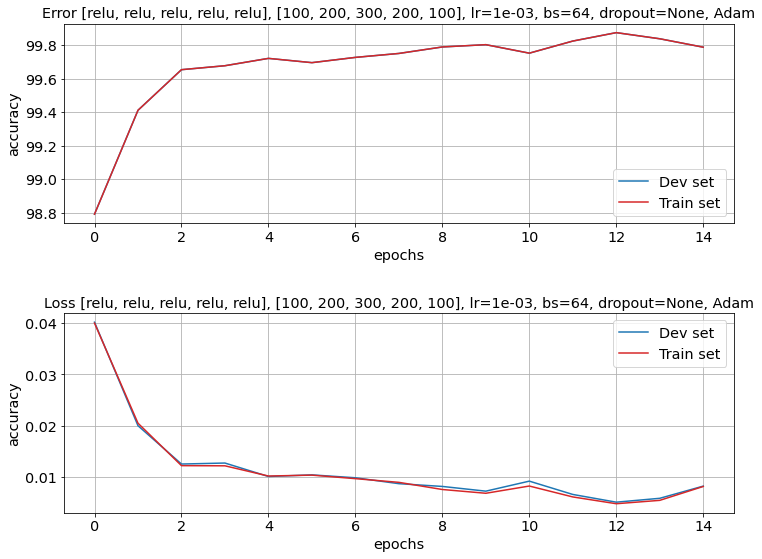

In [99]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=.45)
ax1 = fig.add_subplot(211)
ax1.set_title("Error" + ' [relu, relu, relu, relu, relu], [100, 200, 300, 200, 100], lr=1e-03, bs=64, dropout=None, Adam')    
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.plot(val_acc_1, c='C0', label='Dev set')
ax1.plot(train_acc_1, c='C3', label='Train set')
ax1.legend()
ax1.grid()
ax2 = fig.add_subplot(212)
ax2.set_title("Loss" + ' [relu, relu, relu, relu, relu], [100, 200, 300, 200, 100], lr=1e-03, bs=64, dropout=None, Adam')    
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss')
ax2.plot(val_loss_1, c='C0', label='Dev set')
ax2.plot(train_loss_1, c='C3', label='Train set')
ax2.legend()
ax2.grid()

### Model 3

In [100]:
model_3 = FFNN(d0=16, d1=100, d2=200, d3=300, d4=200, d5=100, l_do=[.5, .5, .5, .5, .5])

lr = 1e-03
epochs = 15
optimizer = torch.optim.Adam(model_3.parameters(), lr, betas=(0.9, 0.999), eps=1e-08)
train_loss_3, train_acc_3, val_loss_3, val_acc_3 = train_model(model_3, dataset, optimizer, epochs=epochs, batch_size=64, device='cpu',
                                            validation_split=0.95, random_seed=42, reports_every=1)

# plot_results(train_loss, train_acc, model_name=' [relu, relu] for Train Set')
# plot_results(val_loss, val_acc, model_name=' [relu, relu] for Validation Set')

Number of parameters: 162601
Red: FFNN(
  (relu): ReLU()
  (fc1): Linear(in_features=16, out_features=100, bias=True)
  (do1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=100, out_features=200, bias=True)
  (do2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=200, out_features=300, bias=True)
  (do3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=300, out_features=200, bias=True)
  (do4): Dropout(p=0.5, inplace=False)
  (fc5): Linear(in_features=200, out_features=100, bias=True)
  (do5): Dropout(p=0.5, inplace=False)
  (fc6): Linear(in_features=100, out_features=1, bias=True)
)
Epoch:015 Train Accuracy:99.67% Train Loss:0.0220 Val Accuracy:99.68% Val Loss:0.0308 Time/epoch:84.631s

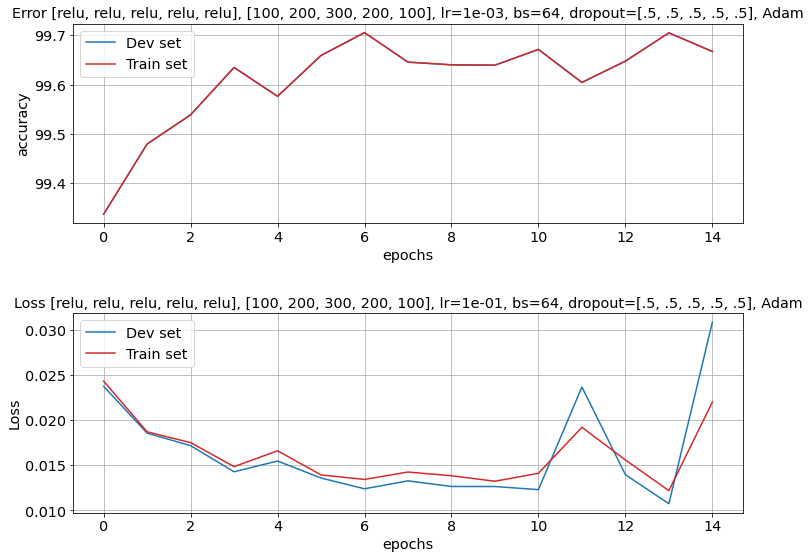

In [101]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=.45)
ax1 = fig.add_subplot(211)
ax1.set_title("Error" + ' [relu, relu, relu, relu, relu], [100, 200, 300, 200, 100], lr=1e-03, bs=64, dropout=[.5, .5, .5, .5, .5], Adam')    
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.plot(val_acc_3, c='C0', label='Dev set')
ax1.plot(train_acc_3, c='C3', label='Train set')
ax1.legend()
ax1.grid()
ax2 = fig.add_subplot(212)
ax2.set_title("Loss" + ' [relu, relu, relu, relu, relu], [100, 200, 300, 200, 100], lr=1e-01, bs=64, dropout=[.5, .5, .5, .5, .5], Adam')    
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss')
ax2.plot(val_loss_3, c='C0', label='Dev set')
ax2.plot(train_loss_3, c='C3', label='Train set')
ax2.legend()
ax2.grid()

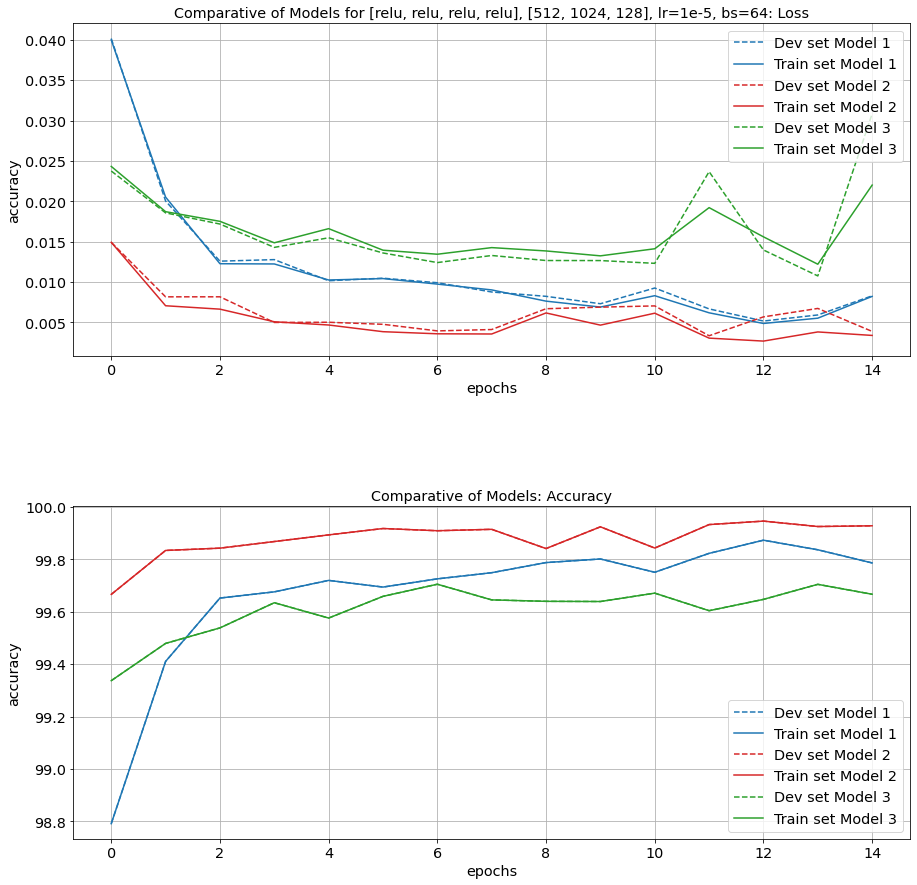

In [114]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=.45)
ax1 = fig.add_subplot(211)
ax1.set_title('Comparative of Models for [relu, relu, relu, relu], [512, 1024, 128], lr=1e-5, bs=64: Loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.plot(val_loss_1, color='C0', label='Dev set Model 1', linestyle='--')
ax1.plot(train_loss_1, color='C0', label='Train set Model 1')
ax1.plot(val_loss_2, color='C3', label='Dev set Model 2', linestyle='--')
ax1.plot(train_loss_2, color='C3', label='Train set Model 2')
ax1.plot(val_loss_3, color='C2', label='Dev set Model 3', linestyle='--')
ax1.plot(train_loss_3, color='C2', label='Train set Model 3')
ax1.legend(loc='upper right')
ax1.grid()
ax2 = fig.add_subplot(212)
ax2.set_title('Comparative of Models: Accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.plot(val_acc_1, color='C0', label='Dev set Model 1', linestyle='--')
ax2.plot(train_acc_1, color='C0', label='Train set Model 1')
ax2.plot(val_acc_2, color='C3', label='Dev set Model 2', linestyle='--')
ax2.plot(train_acc_2, color='C3', label='Train set Model 2')
ax2.plot(val_acc_3, color='C2', label='Dev set Model 3', linestyle='--')
ax2.plot(train_acc_3, color='C2', label='Train set Model 3')
ax2.legend(loc='lower right')
ax2.grid()

In [115]:
df_Csignal

,Event,mc_Entry[0],mc_Entry[1],mc_Entry[2],mc_Entry[3],mc_E[0],mc_E[1],mc_E[2],mc_E[3],mc_Px[0],...,mc_Pz[1],mc_Pz[2],mc_Pz[3],mc_wD,mc_ParentID[0],mc_ParentID[1],mc_ParentID[2],mc_ParentID[3],Delta Invariant Mass,target
213,62.0,366.0,362.0,363.0,364.0,1.511030,0.381856,0.207053,0.339026,0.560580,...,0.217426,0.168055,0.183487,0.761483,223.0,223.0,223.0,223.0,0.761483,1
215,65.0,376.0,379.0,377.0,378.0,0.650874,0.893548,0.194104,0.241624,0.239979,...,0.864243,0.043620,0.164646,0.791042,223.0,223.0,223.0,223.0,0.791042,1
1053,332.0,1941.0,1938.0,1939.0,1940.0,0.928873,0.192345,0.344603,0.434931,0.322285,...,0.074341,0.175386,0.324881,0.796128,223.0,223.0,223.0,223.0,0.796129,1
1573,499.0,2918.0,2919.0,2917.0,2920.0,0.492869,0.687961,0.174929,0.756987,0.245645,...,0.658554,0.147514,0.472846,0.786965,223.0,223.0,223.0,223.0,0.786964,1
1815,545.0,3213.0,3211.0,3210.0,3212.0,1.040669,0.242394,0.811748,0.448346,0.466017,...,0.077463,0.730183,0.407067,0.780433,223.0,223.0,223.0,223.0,0.780433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004220,330738.0,1936749.0,1936746.0,1936747.0,1936748.0,0.983158,0.192051,0.348455,0.366295,0.406457,...,0.067238,0.321026,0.261308,0.801816,223.0,223.0,223.0,223.0,0.801815,1
1004704,330933.0,1937856.0,1937854.0,1937851.0,1937852.0,1.683264,0.896520,0.255749,0.667018,0.734611,...,0.883541,0.231230,0.662056,0.783400,223.0,223.0,223.0,223.0,0.783400,1
1004815,330963.0,1938032.0,1938029.0,1938030.0,1938031.0,0.744530,0.259455,0.231481,0.709896,0.450220,...,0.069156,0.219351,0.598869,0.791529,223.0,223.0,223.0,223.0,0.791529,1
1005506,331201.0,1939414.0,1939417.0,1939413.0,1939418.0,0.169546,0.798800,0.080074,0.945608,0.012623,...,0.660208,0.060703,0.793941,0.781756,223.0,223.0,223.0,223.0,0.781756,1


## Normalization of Data

## Batch Normalization

In [ ]:
# Net pytorch style
class FFNNbn(torch.nn.Module):
    def __init__(self, F, l_h, l_do=[0, 0, 0, 0, 0]):
        super(FFNN, self).__init__()

        # Define the relu function
        self.relu = torch.nn.ReLU()

        # Define layers (nn.module automatically register the 
        # parameters associated)
        self.fc1 = torch.nn.Linear(d0, d1, bias=True)
        self.do1 = torch.nn.Dropout(p=l_do[0])
        self.fc2 = torch.nn.Linear(d1, d2, bias=True)
        self.do2 = torch.nn.Dropout(p=l_do[1])
        self.fc3 = torch.nn.Linear(d2, d3, bias=True)
        self.do3 = torch.nn.Dropout(p=l_do[2])
        self.fc4 = torch.nn.Linear(d3, d4, bias=True)
        self.do4 = torch.nn.Dropout(p=l_do[3])
        self.fc5 = torch.nn.Linear(d4, d5, bias=True)
        self.do5 = torch.nn.Dropout(p=l_do[4])
        self.fc6 = torch.nn.Linear(d5, 1, bias=True)


    def num_parameters(self):
        total = 0
        for p in self.parameters():
            total += p.numel()
        return total


    # Compute the forward
    def forward(self, x):
        u1 = self.fc1(x)
        h1 = self.relu(u1)
        h1 = self.do1(h1)
        u2 = self.fc2(h1)
        h2 = self.relu(u2)
        h2 = self.do2(h2)
        u3 = self.fc3(h2)
        h3 = self.relu(u3)
        h3 = self.do3(h3)
        u4 = self.fc4(h3)
        h4 = self.relu(u4)
        h4 = self.do4(h4)
        u5 = self.fc5(h4)
        h5 = self.relu(u5)
        h5 = self.do5(h5)
        u6 = self.fc6(h5)
        y_pred = torch.sigmoid(u6)

        return y_pred


# Data for $\eta$

array([4, 5])

In [106]:
list_path_Ceta = np.arange(2).tolist()

for i in range(2):
    if i < 9:
        list_path_Ceta[i] = 'data/eta/00/omegaC_0' + str(3+i+1) + '.root'
    else:
        list_path_Ceta[i] = 'data/eta/00/omegaC_' + str(3+i+1) + '.root'

list_C1 = []
list_C2 = []

for i in range(2):
    # if i+1 == 31 or i+1 == 50 or i+1 == 98 or i+1 == 100:
    #     pass
    # else:
    data_Croot = uproot.open(list_path_Ceta[i])

    TTree_signal1 = data_Croot['mix;6']
    TTree_signal2 = data_Croot['mix;5']
    df_C1 = TTree_signal1.arrays(['Event', 'mc_Entry', 'mc_E', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_wD', 'mc_ParentID'], library='pd')
    df_C2 = TTree_signal2.arrays(['Event', 'mc_Entry', 'mc_E', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_wD', 'mc_ParentID'], library='pd')

    df_C1 = df_C1[df_C1 > 0].dropna()
    df_C2 = df_C2[df_C2 > 0].dropna()

    list_C1.append(df_C1)
    list_C2.append(df_C2)

df_C1 = pd.concat(list_C1)
df_C2 = pd.concat(list_C2)

df_Ceta = pd.concat([df_C1, df_C2])

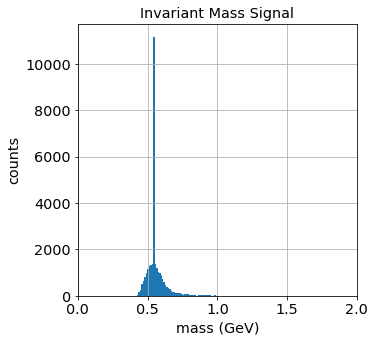

In [107]:
# plotting invariant mass for the signal
data_signal = df_Ceta
p_gg_signal =  [data_signal['mc_E[2]'] + data_signal['mc_E[3]'], data_signal['mc_Px[2]'] + data_signal['mc_Px[3]'], data_signal['mc_Py[2]'] + data_signal['mc_Py[3]'],
                data_signal['mc_Pz[2]'] + data_signal['mc_Pz[3]']]

four_momentum = [data_signal['mc_E[0]'] + data_signal['mc_E[1]'] + p_gg_signal[0], data_signal['mc_Px[0]'] + data_signal['mc_Px[1]'] + p_gg_signal[1],
                data_signal['mc_Py[0]'] + data_signal['mc_Py[1]'] + p_gg_signal[2], data_signal['mc_Pz[0]'] + data_signal['mc_Pz[1]'] + p_gg_signal[3]]

invariant_mass = np.sqrt(four_momentum[0]**2 - four_momentum[1]**2 - four_momentum[2]**2 - four_momentum[3]**2)

plt.figure(figsize=(5,5))
plt.hist(df_Ceta['mc_wD'], bins=100)
plt.title('Invariant Mass Signal')
plt.xlabel('mass (GeV)')
plt.ylabel('counts')
plt.xlim([0, 2.])
plt.grid();

<AxesSubplot:>

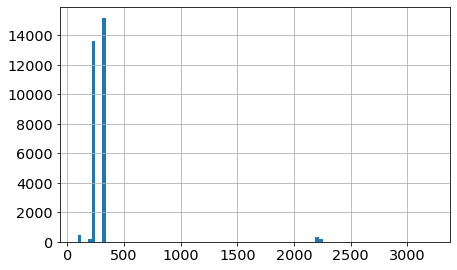

In [ ]:
# make a cut selecting omega candidates with the correct parentID
df_Csignal_eta = df_Ceta[( (df_Ceta['mc_ParentID[1]'] == 223.0) & (df_Ceta['mc_ParentID[2]'] == 223.0) & (df_Ceta['mc_ParentID[3]'] == 223.0) )]

df_C[df_C['Event'] == 62.0]
df_Csignal

In [111]:
df_Ceta

,Event,mc_Entry[0],mc_Entry[1],mc_Entry[2],mc_Entry[3],mc_E[0],mc_E[1],mc_E[2],mc_E[3],mc_Px[0],...,mc_Py[3],mc_Pz[0],mc_Pz[1],mc_Pz[2],mc_Pz[3],mc_wD,mc_ParentID[0],mc_ParentID[1],mc_ParentID[2],mc_ParentID[3]
253,56.0,372.0,375.0,368.0,373.0,0.220629,0.245549,0.061822,0.174558,0.032620,...,0.027499,0.025495,0.197803,0.057871,0.170033,0.587951,331.0,331.0,221.0,221.0
254,56.0,372.0,375.0,368.0,374.0,0.220629,0.245549,0.061822,0.175692,0.032620,...,0.006957,0.025495,0.197803,0.057871,0.149246,0.564853,331.0,331.0,221.0,221.0
264,56.0,372.0,375.0,373.0,374.0,0.220629,0.245549,0.174558,0.175692,0.032620,...,0.006957,0.025495,0.197803,0.170033,0.149246,0.601197,331.0,331.0,221.0,221.0
598,118.0,781.0,782.0,775.0,777.0,0.461387,0.614415,0.082669,0.156098,0.110856,...,0.076747,0.362944,0.555233,0.073703,0.100908,0.459422,331.0,331.0,221.0,221.0
600,118.0,781.0,782.0,775.0,779.0,0.461387,0.614415,0.082669,0.196179,0.110856,...,0.022174,0.362944,0.555233,0.073703,0.151064,0.475318,331.0,331.0,221.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036622,330860.0,2094607.0,2094605.0,2094603.0,2094604.0,0.738043,0.408106,0.149616,0.283532,0.156506,...,0.034623,0.704382,0.374645,0.016013,0.182728,0.698340,221.0,221.0,2214.0,2214.0
1036623,330860.0,2094607.0,2094605.0,2094603.0,2094608.0,0.738043,0.408106,0.149616,1.426509,0.156506,...,0.052004,0.704382,0.374645,0.016013,1.424179,0.451818,221.0,221.0,2214.0,221.0
1036624,330860.0,2094607.0,2094605.0,2094604.0,2094608.0,0.738043,0.408106,0.283532,1.426509,0.156506,...,0.052004,0.704382,0.374645,0.182728,1.424179,0.433837,221.0,221.0,2214.0,221.0
1037190,331019.0,2095622.0,2095623.0,2095620.0,2095621.0,0.346995,0.433909,0.140120,0.165117,0.128667,...,0.009951,0.272111,0.141836,0.111477,0.006335,0.547434,221.0,221.0,221.0,221.0
